[COVID-surge](https://github.com/dpploy/covid-surge) [https://github.com/dpploy/covid-surge] : V. F. de Almeida **14May20**

## US COVID-19 Surge Period Analysis

$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

---
### Table of Contents<a id="toc"></a>
 - [1) Introduction.](#intro)
 - [2) Import COVID-19 data.](#data)
 - [3) Configure run.](#config)
 - [4) Visualize data.](#plot)
 - [5) Fit model to data.](#fit)
 - [6) Analysis.](#analysis)
---

## [Introduction](#toc)<a id="intro"></a>

On-line COVID-19 data is used in this notebook, and a fit to the sigmoid function 
    
\begin{equation*}
\boxed{ f(t) = \frac{\alpha_0}{1 + \alpha_1\, e^{\alpha_2\,t} } }
\end{equation*}
   
is systematically made. The time between points where the function has maximum and minimum curvature is computed and reported as the **surge period**. This period is relevant to public health officials to decide how long measures to control the epidemic should be in place. In addition, the surge period provides insight in comparing how different communities react to the epidemic.

In [1]:
'''Load the covid-surge package'''
#!pip install --upgrade --quiet covid-surge

from covid_surge import Surge
%matplotlib inline

## [Import Data](#toc)<a id="data"></a>



In [2]:
'''Import data'''

# Get complete US surge data
us_surge = Surge()

## [Configure Run](#toc)<a id="config"></a>

In [3]:
'''Set parameters'''

us_surge.end_date = '4/20/20'       # set end date wanted
us_surge.end_date = None            # get all the data available
us_surge.ignore_last_n_days = 2 # allow for data repo to be corrected/updated

In [4]:
'''Configure'''

print('********************************************************************')
print('*                             US                                   *')
print('********************************************************************')

print('# of states/districts: ',len(us_surge.names))
print('# of days:             ',us_surge.dates.shape[0])

********************************************************************
*                             US                                   *
********************************************************************
# of states/districts:  56
# of days:              119


## [Visualize Data](#toc)<a id="plot"></a>



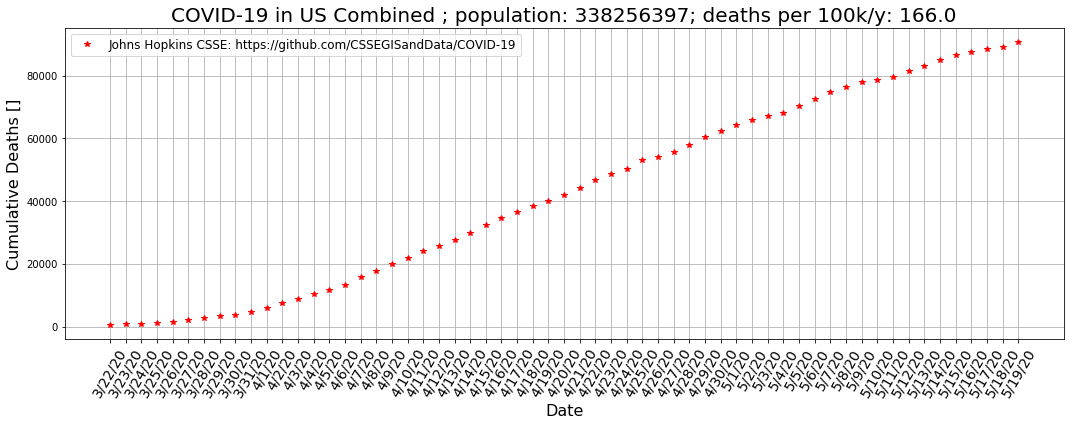


Last 7 days  # of cumulative cases =  [83107. 84923. 86539. 87722. 88528. 89236. 90774.]
Last 7 days  # of added cases = [1816.0, 1616.0, 1183.0, 806.0, 708.0, 1538.0]



In [5]:
'''Visualize data'''

us_surge.plot_covid_data()

import numpy as np

n_last_days = 7
print('')
print('Last %i days'%n_last_days,' # of cumulative cases = ',
          np.sum(us_surge.cases,axis=1)[-n_last_days:])
print('Last %i days'%n_last_days,' # of added cases =',
      [b-a for (b,a) in zip( np.sum(us_surge.cases,axis=1)[-(n_last_days-1):],
                               np.sum(us_surge.cases,axis=1)[-n_last_days:-1] )
        ])
print('')

## [Fit Data](#toc)<a id="fit"></a>


Unscaled root = [ 9.274e+04  2.617e+01 -1.040e-01]
R2            = 0.994



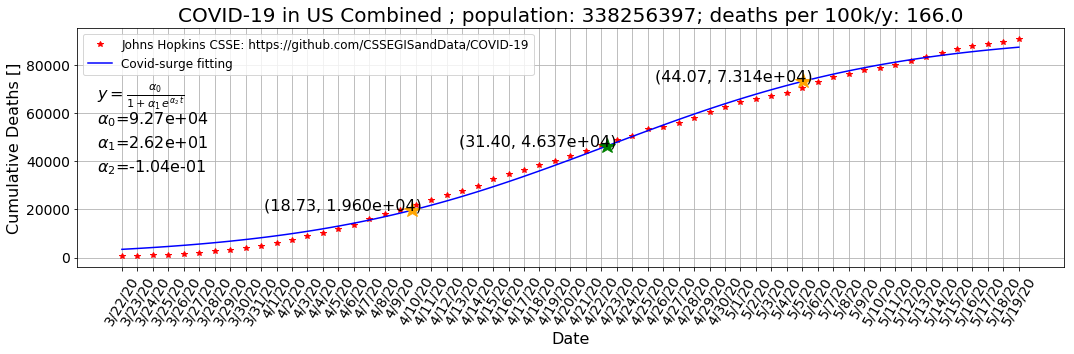

In [6]:
'''Fit data to model function'''

param_vec = us_surge.fit_data()
print('')

# Plot the fit data to model function
us_surge.plot_covid_nlfit(param_vec)

## [Analysis](#toc)<a id="analysis"></a>

In [7]:
# Report critical times
(tc,dtc) = us_surge.critical_times( param_vec )

# Report errors 
us_surge.error_analysis( param_vec, tc, dtc )

# 60-day look-ahead
n_prediction_days = 60

last_day = us_surge.dates.size
total_deaths_predicted = int( us_surge.sigmoid_func(n_prediction_days + last_day, param_vec) )

print('')
print('Estimated cumulative deaths in %s days from %s = %6i'%(n_prediction_days,us_surge.dates[-1],total_deaths_predicted))
print('# of cumulative deaths today, %s               = %6i'%(us_surge.dates[-1],np.sum(us_surge.cases[-1,:])))
print('')


Pointwise Error Analysis

Total error
mean relative error [%] = 46.08
std  relative error [%] = 107.70

Pre-exponential error
mean relative error [%] = 135.23
std  relative error [%] = 155.81

Post-linear error
mean relative error [%] =  1.92
std  relative error [%] =  0.95

Surge period error
mean relative error [%] =  3.73
std  relative error [%] =  2.75

Estimated cumulative deaths in 60 days from 5/19/20 =  92735
# of cumulative deaths today, 5/19/20               =  90774



In [8]:
print('Acceleration period = %4.1f [day]'%(tc-dtc))
print('Surge period        = %4.1f [day]'%(2*dtc))
print('Total period        = %4.1f [day]'%(tc-dtc+2*dtc))

Acceleration period = 18.7 [day]
Surge period        = 25.3 [day]
Total period        = 44.1 [day]
